In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
from scipy.optimize import curve_fit
from pandas.tools.plotting import table
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9] # bigger figures
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows',100)

In [127]:
# Separtors: whitspace, not just tab
# Don't use first column as index
# more info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html
dat = pd.read_table(open('lp.txt'), delim_whitespace=True, index_col=False)

In [135]:
dat

,so1,so2,siso,so,si,sso,ssi,M,sM
0,8.4,8.8,79.9,8.60,71.30,8.60,8.600581,-8.290698,8.350797
1,9.6,8.4,69.8,9.00,60.80,9.00,9.000556,-6.755556,6.829177
2,8.5,9.4,61.1,8.95,52.15,8.95,8.950559,-5.826816,5.912014
3,10.0,8.8,53.1,9.40,43.70,9.40,9.400532,-4.648936,4.755283
4,11.0,9.4,43.9,10.20,33.70,10.20,10.200490,-3.303922,3.451955
5,11.7,9.9,36.8,10.80,26.00,10.80,10.800463,-2.407407,2.606856
6,12.4,11.6,32.8,12.00,20.80,12.00,12.000417,-1.733333,2.001128
7,9.2,8.6,80.8,8.90,71.90,8.90,8.900562,-8.078652,8.140316
8,9.3,8.7,70.5,9.00,61.50,9.00,9.000556,-6.833333,6.906125
9,9.7,9.2,58.8,9.45,49.35,9.45,9.450529,-5.222222,5.317115


In [134]:
dat.so = np.abs(dat.so1 + dat.so2)/2
dat.si = dat.siso - dat.so
dat.sso = np.abs(dat.so1 + dat.so2)/2
dat.ssi = np.sqrt(dat.sso**2 + 0.1**2)
dat.M = - dat.si / dat.so
dat.sM = np.sqrt(1/dat.so**2 * dat.ssi**2 + dat.si**2/dat.so**4 * dat.sso**2)

In [101]:
dat.describe()

,so,d1,d2,sisod,si,d,f,sso,ssi,ssd
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0,13.000000,13.000000
mean,30.976923,18.900000,18.238462,122.384615,72.838462,18.569231,-5.727810,NaN,0.406615,0.369231
std,8.759295,6.858693,6.459946,11.772131,11.943899,6.653180,16.294695,NaN,0.287320,0.303822
min,12.500000,11.800000,12.000000,113.700000,58.950000,12.050000,-11.741132,NaN,0.150000,0.050000
25%,28.100000,14.300000,14.200000,113.700000,65.350000,14.250000,-10.522389,NaN,0.244949,0.200000
50%,32.200000,16.600000,15.700000,115.800000,66.450000,16.150000,-10.133776,NaN,0.287228,0.250000
75%,35.700000,19.100000,18.700000,139.300000,85.900000,18.900000,-9.678595,NaN,0.471699,0.450000
max,44.800000,33.000000,32.000000,139.300000,92.300000,32.500000,48.457332,NaN,1.257975,1.250000


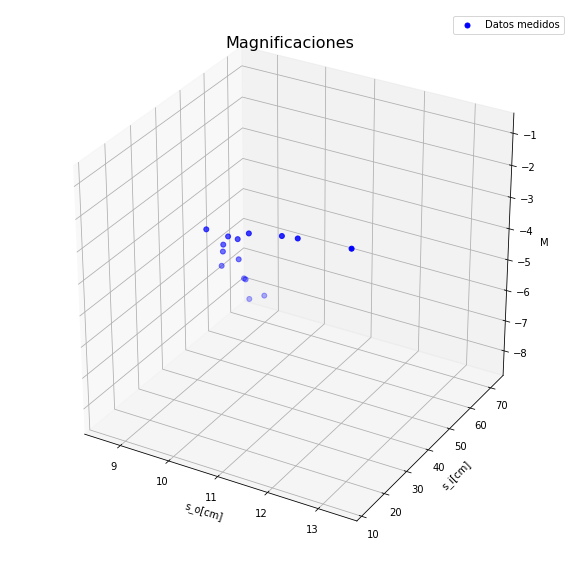

In [137]:
fig = plt.figure(figsize=(10,10))
xx = np.linspace(-0.3, .3, 1000)
xy = np.linspace(-.3, .3, 1000)
xi, xj = np.meshgrid(xx, xy, sparse=False, indexing='ij')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dat.so, dat.si, dat.M, s = 25, c = "b", label='Datos medidos')
#ax.plot_wireframe(xi, xj, madel(xi,xj), rstride=50, cstride=50, color="g", label = "Velocidad experimental")
#ax.plot_wireframe(xi, xj, model(xi,xj), rstride=100, cstride=100, color = "r", label = "Velocidad teórica")
plt.xlabel('s_o[cm]')
plt.ylabel('s_i[cm]')
ax.set_zlabel('M')
plt.title("Magnificaciones", size='16')
plt.legend(loc='best')
plt.savefig('m.pdf')

In [35]:
def f(so, si):
    return si*so/(si+so)

In [212]:
def SI(SO, F):
    return SO*F/(SO-F)
SI(14,7)

14.0

In [181]:
fit_res = curve_fit(SI, dat.si, dat.so, sigma = dat.ssi, p0 = 7)
print(fit_res)
fg = fit_res[0] 
sg=(np.diag(fit_res[1]))
print(fg)


(array([ 7.54870341]), array([[ 0.01384038]]))
[ 7.54870341]


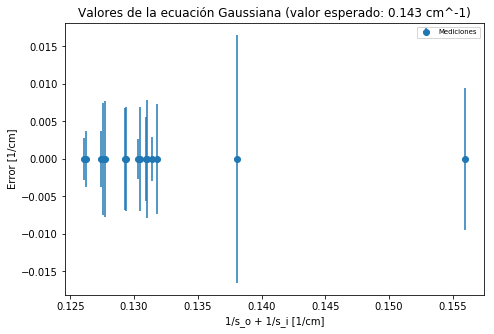

In [242]:
xr = np.linspace(14, 90)
plt.figure(figsize = (7.5, 5))

plt.errorbar(1/dat.si + 1/dat.so, dat.ff , yerr=np.sqrt(1/dat.si**4 * dat.ssi**2 + 1/dat.so**4 * dat.sso**2), xerr=0, fmt= "o", label="Mediciones")
#plt.plot(xr, model(np.radians(xr),  6.4, 0), '-', label='Modelo')
#plt.plot(xr, madel(xr,  43.90179388,   7.32622038), '-', label='Ajuste a A/r + k')
#plt.plot(xr, model(xr, 16873.78914456), '-', label='Ajuste a los datos')
#plt.plot(xr, model(xr, 16873.78914456 + sigma), 'r-.', label='Error del ajuste')
#plt.plot(xr, model(xr, 16873.78914456 - sigma), 'r-.', label='')
plt.xlabel('1/s_o + 1/s_i [1/cm]')
plt.ylabel('Error [1/cm]')
plt.title('Valores de la ecuación Gaussiana (valor esperado: 0.143 cm^-1)')
plt.legend(loc = 0, fontsize='x-small')
plt.savefig('m.pdf')

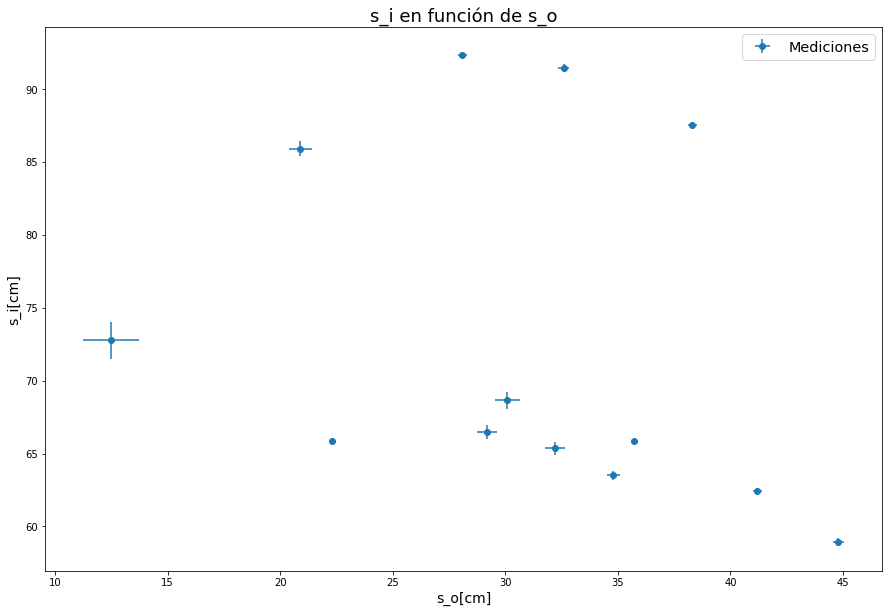

In [300]:
xr = np.linspace(7.01 , 20, 100)
xf = np.linspace(3, 6.99)
xr1 = np.linspace(7.5587 , 20, 100)
xf1 = np.linspace(3, 7.5387)
plt.figure(figsize = (15, 10))
0.117645
plt.errorbar(dat.so, dat.si , xerr= dat.sso, yerr = dat.ssi, fmt= "o", label="Mediciones")
#plt.plot(xr, SI(xr, 7), '-', label='Modelo', color='green')
#plt.plot(xf, SI(xf, 7), '-', color='green')
#plt.plot(xr1, SI(xr1, 7.5487), '-', label='Ajuste', color='red')
#plt.plot(xf1, SI(xf1, 7.5487), '-', color='red')
#plt.plot(xr1, SI(xr1, 7.5487+0.117645), '.', label='Error del ajuste', color='red')
#plt.plot(xf1, SI(xf1, 7.5487+0.117645), '.', color='red')
#plt.plot(xr1, SI(xr1, 7.5487-0.117645), '.', label='Error del ajuste', color='red')
#plt.plot(xf1, SI(xf1, 7.5487-0.117645), '.', color='red')
#plt.xlim(3, 20, emit=False, auto=False)
#plt.ylim(-100, 100, emit=False, auto=False)
plt.xlabel('s_o[cm]', size ='14')
plt.ylabel('s_i[cm]', size ='14')
plt.title('s_i en función de s_o', size='18')
plt.legend(loc = 0, fontsize='x-large')
plt.savefig('enp.pdf')

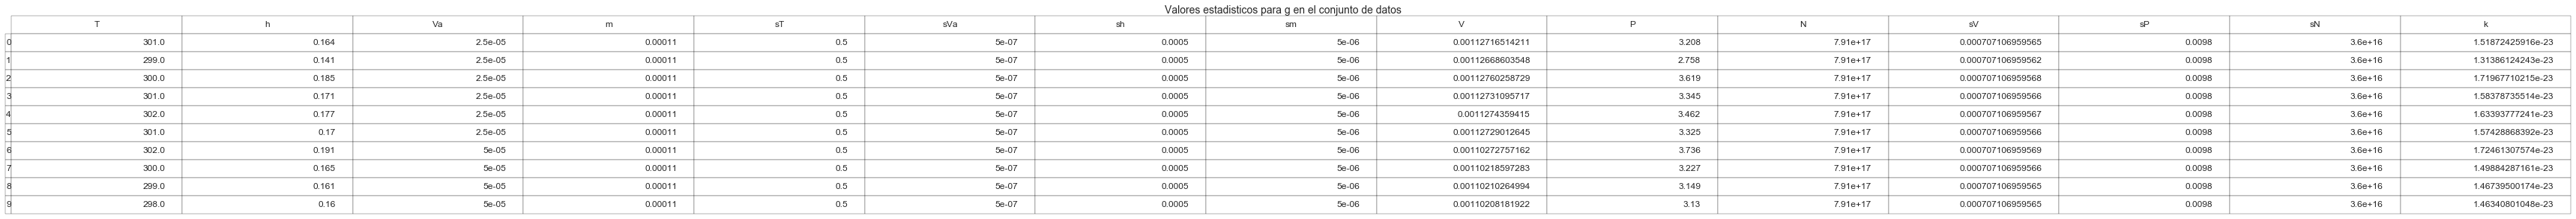

In [332]:
0.000013fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, dat, loc='upper center', colWidths=[0.17]*len(dat.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(2, 2) # change size table
plt.suptitle("Valores estadisticos para g en el conjunto de datos", fontsize=14)
plt.savefig('gw.png', transparent=True)
